In [163]:
import pandas as pd
import seaborn as sns
%pylab inline
import os

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


#### Iporting Training set

In [168]:
os.chdir('..\data')
df_train = pd.read_csv('train.csv')

The firs and simplest informatio we can get from the dataset is the schema. To this end we can use the inf() method

In [169]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [174]:
df_train = df_train.rename(str.replace('-', '_', regex = False), axis = 'columns')

TypeError: str.replace() takes no keyword arguments

We expect education and educational number being redundant. We verify this hypothesis

In [166]:
df_train = df_train.rename(columns={'educational-num':'educational_num',
                        'marital-status':'marital_status',
                        'capital-gain':'capital_gain', 
                        'capital-loss':'capital_loss', 
                        'hours-per-week':'hours_per_week',
                        'native-country':'native_country',
                        'income_>50K': 'income_50K'})

In [155]:
df_train[['education', 'educational_num']].drop_duplicates().sort_values(by = 'educational_num').set_index('educational_num')

KeyError: "['educational_num'] not in index"

Note that for each value of . This means that we can drop one of them. In order clarify the education status we choose to drop the educational num.

In [11]:
df_train = df_train.drop('educational_num', axis= 1)

Now we can separate categorical and nnumerical varibles and exlore them separately

In [158]:
df_train_cat = df_train[['age', 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country', 'income_50K']]

C:\Users\cvitale\AppData\Local\Temp\ipykernel_13916\1568487024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binned.age = pd.qcut(binned.age, q=5)


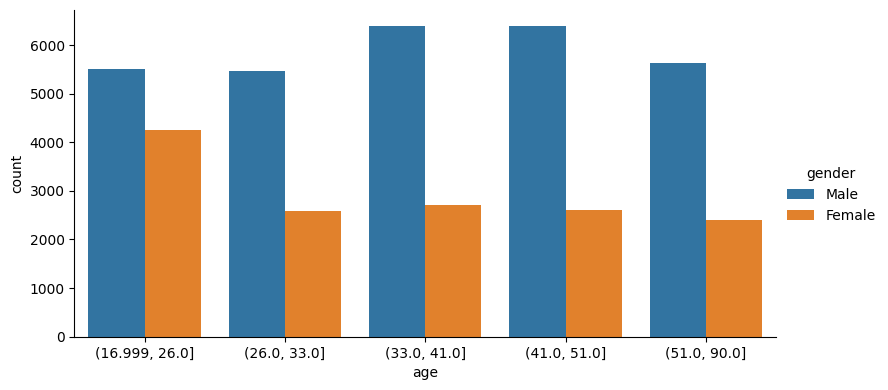

In [157]:
binned = df_train_cat 
binned.age = pd.qcut(binned.age, q=5)

sns.catplot(data = binned, 
            x = 'age',
            kind="count",
            hue = 'gender',
            height = 4, aspect = 2)

TypeError: 'NoneType' object is not iterable

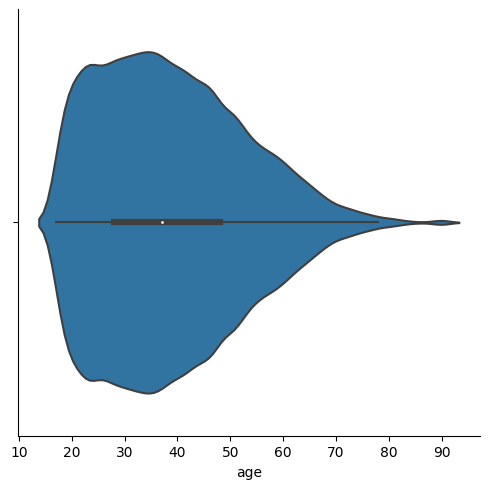

In [162]:
sns.catplot(data = df_train_cat, x = 'age', kind = 'violin', hue = 'gender', split = True)